In [1]:
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 15.7 MB/s eta 0:00:00


In [2]:
import requests
import os
import openai

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
openai.api_key = ""

In [5]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=8FZQQD4S9XQI0JQA'
r = requests.get(url)
data = r.json()

data = data['Time Series (5min)']
first_entry = next(iter(data.values()))
share_price = float(first_entry['4. close'])
share_price

138.22

In [6]:
def fetch_sheets(fn, symbol):
    url = f'https://www.alphavantage.co/query?function={fn}&symbol={symbol}&apikey=8FZQQD4S9XQI0JQA'
    data = requests.get(url)
    return data.json()

In [7]:
def return_q1_q2(lista):
  return lista[0], lista[1], lista[2], lista[3]

In [8]:
bs_quarterly_data = fetch_sheets('BALANCE_SHEET', 'IBM')['quarterlyReports'][:4]
is_quarterly_data = fetch_sheets('INCOME_STATEMENT', 'IBM')['quarterlyReports'][:4]
cf_quarterly_data = fetch_sheets('CASH_FLOW', 'IBM')['quarterlyReports'][:4]

In [9]:
bs_q1 , bs_q2, bs_q3, bs_q4 = return_q1_q2(bs_quarterly_data)
is_q1 , is_q2, is_q3, is_q4 = return_q1_q2(is_quarterly_data)
cf_q1 , cf_q2, cf_q3, cf_q4 = return_q1_q2(cf_quarterly_data)

In [10]:
def calculate_metrics(is_q1, is_q2, is_q3, is_q4, bs_q1, bs_q2, bs_q3, bs_q4, cf_q1, cf_q2, cf_q3, cf_q4, quarter):
  if quarter == 'q1':
    is_data = is_q1
    bs_data = bs_q1
    cf_data = cf_q1
    is_data_2 = is_q2
    bs_data_2 = bs_q2
    cf_data_2 = cf_q2

  elif quarter == 'q2':
    is_data = is_q2
    bs_data = bs_q2
    cf_data = cf_q2
    is_data_2 = is_q3
    bs_data_2 = bs_q3
    cf_data_2 = cf_q3

  else:
    is_data = is_q3
    bs_data = bs_q3
    cf_data = cf_q3
    is_data_2 = is_q4
    bs_data_2 = bs_q4
    cf_data_2 = cf_q4


  EBT = float(is_data['incomeBeforeTax'])
  EBIT = float(is_data['grossProfit']) - float(is_data['operatingExpenses'])
  revenue = float(is_data['totalRevenue'])
  average_assets = (float(bs_data['totalAssets'])+float(bs_data_2['totalAssets']))/2
  average_equity = (float(bs_data['totalShareholderEquity'])+float(bs_data_2['totalShareholderEquity']))/2
  retained_earnings = float(cf_data['netIncome']) - float(cf_data['dividendPayout'])
  tax_burden = float(is_data['netIncome']) / EBT
  retention_rate = 1 - (float(cf_data['dividendPayout'])/float(cf_data['netIncome']))
  dividend_payout_ratio = (float(cf_data['dividendPayout'])/float(cf_data['netIncome']))

  return EBT, EBIT, revenue, average_assets, average_equity, retained_earnings, tax_burden, retention_rate, dividend_payout_ratio



In [11]:
EBT_q1, EBIT_q1, revenue_q1, average_assets, average_equity, retained_earnings_q1, tax_burden_q1, retention_rate_q1,dividend_payout_ratio_q1 = calculate_metrics(is_q1, is_q2, is_q3, is_q4, bs_q1, bs_q2, bs_q3, bs_q4, cf_q1, cf_q2, cf_q3, cf_q4, "q1")

In [12]:
EBT_q2, EBIT_q2, revenue_q2, average_assets, average_equity, retained_earnings_q2, tax_burden_q2, retention_rate_q2, dividend_payout_ratio_q2 = calculate_metrics(is_q1, is_q2, is_q3, is_q4, bs_q1, bs_q2, bs_q3, bs_q4, cf_q1, cf_q2, cf_q3, cf_q4, "q2")
EBT_q3, EBIT_q3, revenue_q3, average_assets, average_equity, retained_earnings_q3, tax_burden_q3, retention_rate_q3, dividend_payout_ratio_q3 = calculate_metrics(is_q1, is_q2, is_q3, is_q4, bs_q1, bs_q2, bs_q3, bs_q4, cf_q1, cf_q2, cf_q3, cf_q4, "q3")

# Dupont Analysis

In [13]:
interest_burden_q3 = EBT_q3/EBIT_q3
operating_profit_margin_q3 = EBIT_q3/revenue_q3
asset_turnover_q3 = revenue_q3/average_assets
financial_leverage_ratio_q3 = average_assets/average_equity

In [14]:
interest_burden_q2 = EBT_q2/EBIT_q2
operating_profit_margin_q2 = EBIT_q2/revenue_q2
asset_turnover_q2 = revenue_q2/average_assets
financial_leverage_ratio_q2 = average_assets/average_equity

In [15]:
interest_burden_q1 = EBT_q1/EBIT_q1
operating_profit_margin_q1 = EBIT_q1/revenue_q1
asset_turnover_q1 = revenue_q1/average_assets
financial_leverage_ratio_q1 = average_assets/average_equity

In [16]:
roe_q1 = tax_burden_q1*interest_burden_q1*operating_profit_margin_q1*asset_turnover_q1*financial_leverage_ratio_q1
roe_q1

0.04695453969861973

In [17]:
roe_q2 = tax_burden_q2*interest_burden_q2*operating_profit_margin_q2*asset_turnover_q2*financial_leverage_ratio_q2
roe_q3 = tax_burden_q3*interest_burden_q3*operating_profit_margin_q3*asset_turnover_q3*financial_leverage_ratio_q3

In [18]:
roe_q2

0.13726731670254527

In [19]:
roe_q2
roe_q3

-0.16188425984551094

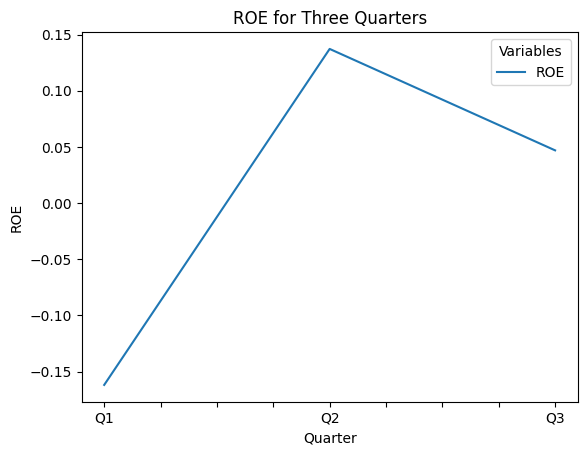

In [20]:
roe_scores = {'Quarter': ['Q1', 'Q2', 'Q3'],
            'ROE': [roe_q3, roe_q2, roe_q1]}
df = pd.DataFrame(roe_scores)
df.set_index('Quarter', inplace=True)
df.plot(kind='line')
plt.xlabel('Quarter')
plt.ylabel('ROE')
plt.title('ROE for Three Quarters')
plt.legend(title='Variables')
plt.show()

In [21]:
response4 = openai.Completion.create(
  model="text-davinci-003",
  prompt=f"DuPont Analysis is a framework used to break apart the underlying ratio components of the return on equity (ROE) metric to determine the strengths and weaknesses of a company.\n\nRoE obtained by 5 step dupont analysis for 3 quarters : {roe_q1}, {roe_q2}, {roe_q3}. Analyse these values, compare them and give inferences.",
  temperature=1,
  max_tokens=256,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
)

In [22]:
print(response4.choices[0].text)



These three RoE values reflect the company's performance over the past three quarters. The first value of 0.04695453969861973 indicates that the company had a slightly positive return on equity, suggesting that it is a relatively healthy company. The second value of 0.13726731670254527 is substantially higher, indicating that the company had a strong performance in the quarter, with profits being generated from the capital employed. The third value of -0.16188425984551094 suggests that the company had losses in the third quarter, meaning the company's profits were unable to cover its operating costs. 

Overall, the DuPont analysis indicates that the company had a generally positive trend of returns on equity in the past three quarters, but experienced losses in the most recent quarter. This could be concerning, and suggests that the company needs to find ways to reduce its operating costs and improve its return on equity in the future.


# Growth rate

In [23]:
growth_rate_q1 = retention_rate_q1 * roe_q1
growth_rate_q2 = retention_rate_q2 * roe_q2
growth_rate_q3 = retention_rate_q3 * roe_q3
growth_rate_q1

-0.02887172343928074

In [24]:
growth_rate_q2

0.061593010003798916

In [25]:
growth_rate_q3

-0.2374066101051032

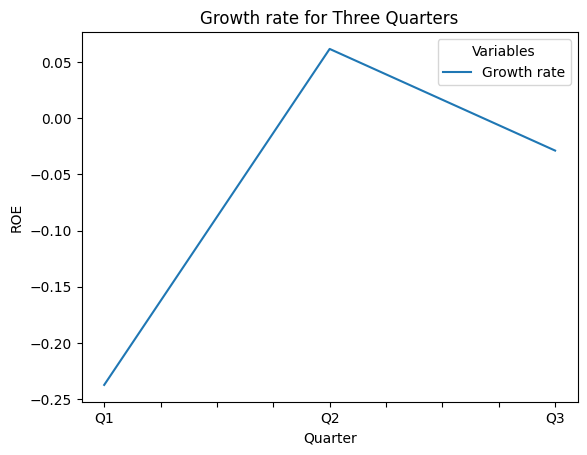

In [26]:
growth_scores = {'Quarter': ['Q1', 'Q2', 'Q3'],
            'Growth rate': [growth_rate_q3, growth_rate_q2, growth_rate_q1]}
df = pd.DataFrame(growth_scores)
df.set_index('Quarter', inplace=True)
df.plot(kind='line')
plt.xlabel('Quarter')
plt.ylabel('ROE')
plt.title('Growth rate for Three Quarters')
plt.legend(title='Variables')
plt.show()

In [58]:

response2 = openai.Completion.create(
  model="text-davinci-003",
  prompt=f"Given the Growth rate of a company, analyse it and give key inferences from it. If it is negative, suggest ways to improve it. Growth rate is calculated by multiplying retention rate and Return on equity.\n\nGrowth rate for 3 quarters : {growth_rate_q1}, {growth_rate_q2}, {growth_rate_q3} respectively",
  temperature=1,
  max_tokens=256,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
)

In [59]:
print(response2.choices[0].text)



The growth rate of the company's operations for the past 3 quarters has been negative 0.02887172343928074, positive 0.061593010003798916, and negative 0.2374066101051032 respectively.

Based on these values, we can infer that the company's growth rate is in question. It appears that the company has not been able to generate profits at a rate that can keep up with inflation or cost of capital increases. Additionally, the company may have not been able to generate enough revenue to cover its expenses or to increase its reinvestment rate, resulting in a negative growth rate.

To improve the growth rate, the company needs to take a look at its retention rate and return on equity. The company should focus on retaining more of its customers, as this will help boost revenue. The company should also look to increase its return on equity by increasing the amount of money it invests in its operations. Increasing R&D spending, expanding its product portfolio, and leveraging technology can all h

# Altman z score

In [29]:
def get_z_score(is_q1, is_q2, is_q3, is_q4, bs_q1, bs_q2, bs_q3, bs_q4, cf_q1, cf_q2, cf_q3, cf_q4, share_price, quarter):
  if quarter == 'q1':
    is_data = is_q1
    bs_data = bs_q1
    cf_data = cf_q1
    is_data_2 = is_q2
    bs_data_2 = bs_q2
    cf_data_2 = cf_q2

  elif quarter == 'q2':
    is_data = is_q2
    bs_data = bs_q2
    cf_data = cf_q2
    is_data_2 = is_q3
    bs_data_2 = bs_q3
    cf_data_2 = cf_q3

  else:
    is_data = is_q3
    bs_data = bs_q3
    cf_data = cf_q3
    is_data_2 = is_q4
    bs_data_2 = bs_q4
    cf_data_2 = cf_q4


  retained_earnings = float(cf_data['netIncome']) - float(cf_data['dividendPayout'])
  EBIT = float(is_data['grossProfit']) - float(is_data['operatingExpenses'])
  z1 = (float(bs_data["totalCurrentAssets"]) - float(bs_data["totalCurrentLiabilities"]))/float(bs_data["totalAssets"])
  z2 = 1.4 * (retained_earnings/float(bs_data["totalAssets"]))
  z3 = 3.3 * (EBIT/float(bs_data["totalAssets"]))
  z4 = 0.6 * (float(bs_data['commonStockSharesOutstanding'])*share_price)/float(bs_data['totalLiabilities'])
  z5 = 1 * (float(is_data['totalRevenue'])/float(bs_data['totalAssets']))

  return z1 + z2 + z3 + z4 + z5


In [30]:
z_score_q1 = get_z_score(is_q1, is_q2, is_q3, is_q4, bs_q1, bs_q2, bs_q3, bs_q4, cf_q1, cf_q2, cf_q3, cf_q4, share_price, "q1")

In [31]:
z_score_q2 = get_z_score(is_q1, is_q2, is_q3, is_q4, bs_q1, bs_q2, bs_q3, bs_q4, cf_q1, cf_q2, cf_q3, cf_q4, share_price, "q2")
z_score_q3 = get_z_score(is_q1, is_q2, is_q3, is_q4, bs_q1, bs_q2, bs_q3, bs_q4, cf_q1, cf_q2, cf_q3, cf_q4, share_price, "q3")

In [32]:
z_score_q1

0.8165171884270418

In [33]:
z_score_q2

0.9253621823938083

In [34]:
z_score_q3

0.7961859567497119

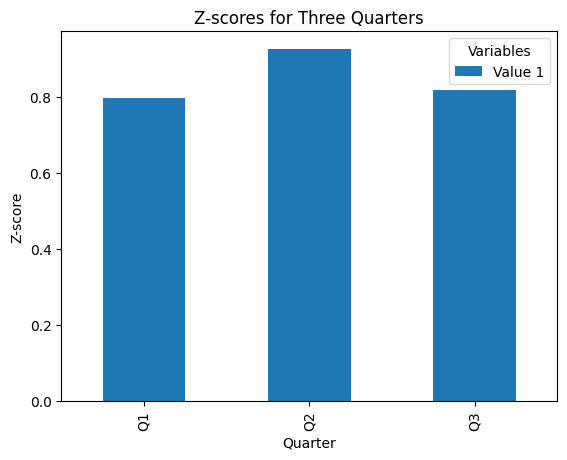

In [35]:
z_scores = {'Quarter': ['Q1', 'Q2', 'Q3'],
            'Value 1': [z_score_q3, z_score_q2, z_score_q1]}
df = pd.DataFrame(z_scores)
df.set_index('Quarter', inplace=True)
df.plot(kind='bar')
plt.xlabel('Quarter')
plt.ylabel('Z-score')
plt.title('Z-scores for Three Quarters')
plt.legend(title='Variables')
plt.show()

In [36]:
z_score_prompt = f"You will be given the z score of a company. Analyse it based on the following criteria \ni) z score < 1.8 = bankrupt\nii) 1.8<z score<2.6 = Grey zone\niii) z score > 2.6 = safe zone \nand give inference about it. If it is not a good score what can the company do to improve it. \n\nZ score for the past 3 quarters are {z_score_q1}, {z_score_q2} and {z_score_q3}  respectively"

In [37]:

response = openai.Completion.create(
  model="text-davinci-003",
  prompt=z_score_prompt,
  temperature=1,
  max_tokens=256,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
)

In [38]:
print(response.choices[0].text)

.

The company's overall z score falls into the bankrupt category (< 1.8). This indicates a high financial risk with poor creditworthiness and significant potential of financial distress. The company should take necessary measures to improve their z score such as increasing its current ratio and reducing its debt to equity ratio. It should also look at reducing costs and increasing revenues to improve its profits. Additionally, the company should focus on improving its liquidity position by optimizing its working capital and maintaining its debt service coverage ratio within an acceptable range.


# Cash Conversion Cycle (**CCC**)

In [39]:
def get_ccc(bs_q1, bs_q2, bs_q3, bs_q4, is_q1, is_q2, is_q3, is_q4, cf_q1, cf_q2, cf_q3, cf_q4, quarter):
  if quarter == 'q1':
    is_data = is_q1
    bs_data = bs_q1
    cf_data = cf_q1
    is_data_2 = is_q2
    bs_data_2 = bs_q2
    cf_data_2 = cf_q2

  elif quarter == 'q2':
    is_data = is_q2
    bs_data = bs_q2
    cf_data = cf_q2
    is_data_2 = is_q3
    bs_data_2 = bs_q3
    cf_data_2 = cf_q3

  else:
    is_data = is_q3
    bs_data = bs_q3
    cf_data = cf_q3
    is_data_2 = is_q4
    bs_data_2 = bs_q4
    cf_data_2 = cf_q4

  receivable_turnover = float(is_data['totalRevenue']) / ((float(bs_data['currentNetReceivables'])+float(bs_data_2['currentNetReceivables']))/2)
  days_of_sale_outstanding = 365 / receivable_turnover
  inventory_turnover = float(is_data['costofGoodsAndServicesSold']) / ((float(bs_data['inventory'])+float(bs_data_2['inventory']))/2)
  days_of_inventory_on_hand = 365 / inventory_turnover
  purchase = float(bs_data['inventory']) - float(bs_data_2['inventory']) + float(is_data['costofGoodsAndServicesSold'])
  average_trade_payables = (float(bs_data['currentAccountsPayable']) + float(bs_data_2['currentAccountsPayable'])) / 2
  payables_turnover = purchase / average_trade_payables
  number_of_days_of_payables = 365 / payables_turnover
  ccc = days_of_sale_outstanding + days_of_inventory_on_hand - number_of_days_of_payables

  return ccc

In [40]:
ccc_q1 = get_ccc(bs_q1, bs_q2, bs_q3, bs_q4, is_q1, is_q2, is_q3, is_q4, cf_q1, cf_q2, cf_q3, cf_q4, 'q1')
ccc_q2 = get_ccc(bs_q1, bs_q2, bs_q3, bs_q4, is_q1, is_q2, is_q3, is_q4, cf_q1, cf_q2, cf_q3, cf_q4, 'q2')
ccc_q3 = get_ccc(bs_q1, bs_q2, bs_q3, bs_q4, is_q1, is_q2, is_q3, is_q4, cf_q1, cf_q2, cf_q3, cf_q4, 'q3')

In [41]:
ccc_q1

2009.7854946933985

In [42]:
ccc_q2

31013.108434527694

In [43]:
ccc_q3

3092.466670007334

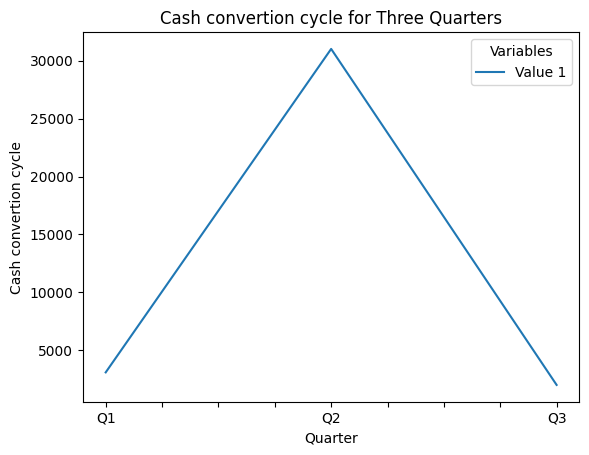

In [44]:
ccc = {'Quarter': ['Q1', 'Q2', 'Q3'],
            'Value 1': [ccc_q3, ccc_q2, ccc_q1]}
df = pd.DataFrame(ccc)
df.set_index('Quarter', inplace=True)
df.plot(kind='line')
plt.xlabel('Quarter')
plt.ylabel('Cash convertion cycle')
plt.title('Cash convertion cycle for Three Quarters')
plt.legend(title='Variables')
plt.show()

In [45]:

response3 = openai.Completion.create(
  model="text-davinci-003",
  prompt=f"Given the cash conversion cycle of a company, analyse it and give key inferences from it. The cash conversion cycle (CCC) – also known as the cash cycle – is a metric expressing how many days it takes a company to convert the cash it spends on inventory back into cash by selling its product. The shorter a company's CCC, the less time it has money tied up in accounts receivable and inventory. If it is large, suggest ways to shortern it. \n\nCCC for 3 quarters : {ccc_q1}, {ccc_q2}, {ccc_q3} respectively.",
  temperature=1,
  max_tokens=256,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
)

In [46]:
print(response3.choices[0].text)



The analysis of these three quarters suggests that the cash conversion cycle of the company is relatively high. This means that the company is taking longer than average to convert cash spent on inventory into cash by selling products. To shorten the CCC, the company can consider implementing strategies such as: improving purchase order processing, ensuring efficient inventory management, training employees in accounts receivable, and offering payment incentives or discounts to customers. These strategies will likely result in faster cash sales, ultimately leading to a shorter cash conversion cycle.


# Liquidity ratios

In [47]:
def get_liquidity_ratios(bs_q1, bs_q2, bs_q3, bs_q4, is_q1, is_q2, is_q3, is_q4, cf_q1, cf_q2, cf_q3, cf_q4, quarter):
  if quarter == 'q1':
    is_data = is_q1
    bs_data = bs_q1
    cf_data = cf_q1
    is_data_2 = is_q2
    bs_data_2 = bs_q2
    cf_data_2 = cf_q2

  elif quarter == 'q2':
    is_data = is_q2
    bs_data = bs_q2
    cf_data = cf_q2
    is_data_2 = is_q3
    bs_data_2 = bs_q3
    cf_data_2 = cf_q3

  else:
    is_data = is_q3
    bs_data = bs_q3
    cf_data = cf_q3
    is_data_2 = is_q4
    bs_data_2 = bs_q4
    cf_data_2 = cf_q4


  current_assets = float(bs_data['totalCurrentAssets'])
  current_liabilities = float(bs_data['totalCurrentLiabilities'])
  quick_n = float(bs_data['cashAndCashEquivalentsAtCarryingValue']) + float(bs_data['currentNetReceivables'])
  cash_n = float(bs_data['cashAndCashEquivalentsAtCarryingValue'])
  current_ratio = current_assets / current_liabilities
  quick_ratio = quick_n / current_liabilities
  cash_ratio = cash_n / current_liabilities
  defensive_interval = quick_n / ((float(is_data['totalRevenue']) - float(is_data['netIncome']))/365)

  return current_ratio, quick_ratio, cash_ratio, defensive_interval



In [48]:
current_ratio_q1, quick_ratio_q1, cash_ratio_q1, defensive_interval_q1 = get_liquidity_ratios(bs_q1, bs_q2, bs_q3, bs_q4, is_q1, is_q2, is_q3, is_q4, cf_q1, cf_q2, cf_q3, cf_q4, 'q1')

In [49]:
current_ratio_q2, quick_ratio_q2, cash_ratio_q2, defensive_interval_q2 = get_liquidity_ratios(bs_q1, bs_q2, bs_q3, bs_q4, is_q1, is_q2, is_q3, is_q4, cf_q1, cf_q2, cf_q3, cf_q4, 'q2')
current_ratio_q3, quick_ratio_q3, cash_ratio_q3, defensive_interval_q3 = get_liquidity_ratios(bs_q1, bs_q2, bs_q3, bs_q4, is_q1, is_q2, is_q3, is_q4, cf_q1, cf_q2, cf_q3, cf_q4, 'q3')

## Solvency Ratios

In [50]:
def get_solvency_ratios(bs_q1, bs_q2, bs_q3, bs_q4, is_q1, is_q2, is_q3, is_q4, cf_q1, cf_q2, cf_q3, cf_q4, quarter):
  if quarter == 'q1':
    is_data = is_q1
    bs_data = bs_q1
    cf_data = cf_q1
    is_data_2 = is_q2
    bs_data_2 = bs_q2
    cf_data_2 = cf_q2

  elif quarter == 'q2':
    is_data = is_q2
    bs_data = bs_q2
    cf_data = cf_q2
    is_data_2 = is_q3
    bs_data_2 = bs_q3
    cf_data_2 = cf_q3

  else:
    is_data = is_q3
    bs_data = bs_q3
    cf_data = cf_q3
    is_data_2 = is_q4
    bs_data_2 = bs_q4
    cf_data_2 = cf_q4

  total_debt = float(bs_data['longTermDebt']) + float(bs_data['shortTermDebt'])
  total_shareholder_equity = float(bs_data['totalShareholderEquity'])
  total_assets = float(bs_data['totalAssets'])
  interest_expenses = float(is_data['interestExpense'])
  EBIT = float(is_data['grossProfit']) - float(is_data['operatingExpenses'])

  debt_to_equity = total_debt / total_shareholder_equity
  debt_to_capital = total_debt / (total_debt + total_shareholder_equity)
  debt_to_assets = total_debt / total_assets
  financial_leverage = average_assets / average_equity
  interest_coverage = EBIT / interest_expenses

  return debt_to_equity, debt_to_capital, debt_to_assets, financial_leverage, interest_coverage




In [51]:
debt_to_equity_q1, debt_to_capital_q1, debt_to_assets_q1, financial_leverage_q1, interest_coverage_q1 = get_solvency_ratios(bs_q1, bs_q2, bs_q3, bs_q4, is_q1, is_q2, is_q3, is_q4, cf_q1, cf_q2, cf_q3, cf_q4, 'q1')
debt_to_equity_q2, debt_to_capital_q2, debt_to_assets_q2, financial_leverage_q2, interest_coverage_q2 = get_solvency_ratios(bs_q1, bs_q2, bs_q3, bs_q4, is_q1, is_q2, is_q3, is_q4, cf_q1, cf_q2, cf_q3, cf_q4, 'q2')
debt_to_equity_q3, debt_to_capital_q3, debt_to_assets_q3, financial_leverage_q3, interest_coverage_q3 = get_solvency_ratios(bs_q1, bs_q2, bs_q3, bs_q4, is_q1, is_q2, is_q3, is_q4, cf_q1, cf_q2, cf_q3, cf_q4, 'q3')

## Profitability Ratios

In [52]:
def get_profitabilty_ratios(bs_q1, bs_q2, bs_q3, bs_q4, is_q1, is_q2, is_q3, is_q4, cf_q1, cf_q2, cf_q3, cf_q4, quarter):
  if quarter == 'q1':
    is_data = is_q1
    bs_data = bs_q1
    cf_data = cf_q1
    is_data_2 = is_q2
    bs_data_2 = bs_q2
    cf_data_2 = cf_q2

  elif quarter == 'q2':
    is_data = is_q2
    bs_data = bs_q2
    cf_data = cf_q2
    is_data_2 = is_q3
    bs_data_2 = bs_q3
    cf_data_2 = cf_q3

  else:
    is_data = is_q3
    bs_data = bs_q3
    cf_data = cf_q3
    is_data_2 = is_q4
    bs_data_2 = bs_q4
    cf_data_2 = cf_q4

  gross_profit = float(is_data['grossProfit'])
  total_debt = float(bs_data['longTermDebt']) + float(bs_data['shortTermDebt'])
  net_income = float(is_data['netIncome'])
  average_total_capital = ((float(bs_data['totalShareholderEquity']) + float(bs_data['totalShareholderEquity'])) / 2) + ((total_debt + float(bs_data_2['longTermDebt']) + float(bs_data_2['shortTermDebt']))/2)
  EBT = float(is_data['incomeBeforeTax'])
  EBIT = float(is_data['grossProfit']) - float(is_data['operatingExpenses'])
  revenue = float(is_data['totalRevenue'])
  operating_profit_margin = EBIT/revenue


  gross_profit_margin = gross_profit / revenue
  net_profit_margin = net_income / revenue
  operating_profit_margin
  pre_tax_profit_margin = EBT / revenue

  ROA = net_income / average_assets
  operating_roa = EBIT / average_assets
  ROC = EBIT / average_total_capital
  ROE = net_income / average_equity

  return ROA, operating_roa, ROC, ROE

In [53]:
roa_q1, operating_roa_q1, roc_q1, roe_q1 =  get_profitabilty_ratios(bs_q1, bs_q2, bs_q3, bs_q4, is_q1, is_q2, is_q3, is_q4, cf_q1, cf_q2, cf_q3, cf_q4, 'q1')
roa_q2, operating_roa_q2, roc_q2, roe_q2 =  get_profitabilty_ratios(bs_q1, bs_q2, bs_q3, bs_q4, is_q1, is_q2, is_q3, is_q4, cf_q1, cf_q2, cf_q3, cf_q4, 'q2')
roa_q3, operating_roa_q3, roc_q3, roe_q3 =  get_profitabilty_ratios(bs_q1, bs_q2, bs_q3, bs_q4, is_q1, is_q2, is_q3, is_q4, cf_q1, cf_q2, cf_q3, cf_q4, 'q3')



## Equity analysis

In [54]:
def get_equity_analysis(bs_q1, bs_q2, bs_q3, bs_q4, is_q1, is_q2, is_q3, is_q4, cf_q1, cf_q2, cf_q3, cf_q4, quarter):
  if quarter == 'q1':
    is_data = is_q1
    bs_data = bs_q1
    cf_data = cf_q1
    is_data_2 = is_q2
    bs_data_2 = bs_q2
    cf_data_2 = cf_q2

  elif quarter == 'q2':
    is_data = is_q2
    bs_data = bs_q2
    cf_data = cf_q2
    is_data_2 = is_q3
    bs_data_2 = bs_q3
    cf_data_2 = cf_q3

  else:
    is_data = is_q3
    bs_data = bs_q3
    cf_data = cf_q3
    is_data_2 = is_q4
    bs_data_2 = bs_q4
    cf_data_2 = cf_q4

  outstanding_common_shares = (float(bs_data['commonStockSharesOutstanding']))
  divident_per_share = float(cf_data['dividendPayout']) / outstanding_common_shares
  net_income = float(is_data['netIncome'])

  eps = net_income / outstanding_common_shares
  pe = share_price / eps
  divident_yield = divident_per_share / share_price

  return eps, pe, divident_yield

In [55]:
eps_q1, pe_q1, divident_yield_q1 = get_equity_analysis(bs_q1, bs_q2, bs_q3, bs_q4, is_q1, is_q2, is_q3, is_q4, cf_q1, cf_q2, cf_q3, cf_q4, 'q1')
eps_q2, pe_q2, divident_yield_q2 = get_equity_analysis(bs_q1, bs_q2, bs_q3, bs_q4, is_q1, is_q2, is_q3, is_q4, cf_q1, cf_q2, cf_q3, cf_q4, 'q2')
eps_q3, pe_q3, divident_yield_q3 = get_equity_analysis(bs_q1, bs_q2, bs_q3, bs_q4, is_q1, is_q2, is_q3, is_q4, cf_q1, cf_q2, cf_q3, cf_q4, 'q3')

In [56]:
operational_efficiency_q1 = float(is_q1['operatingExpenses'])/float(is_q1['totalRevenue'])
operational_efficiency_q2 = float(is_q1['operatingExpenses'])/float(is_q1['totalRevenue'])
operational_efficiency_q3 = float(is_q1['operatingExpenses'])/float(is_q1['totalRevenue'])


In [57]:
import pandas as pd

# Provided values
quarters = ['Q1', 'Q2', 'Q3']
z_scores = [0.7891861713143984, 0.8963250784949658, 0.7673452703535641]
cash_conversion_cycle = [2009.7854946933985, 31013.108434527694, 3092.466670007334]
roe_values = [0.04695453969861973, 0.13726731670254527, -0.16188425984551094]
growth_rates = [-0.02887172343928074, 0.061593010003798916, -0.2374066101051032]
eps = [eps_q1, eps_q2, eps_q3]
pe = [pe_q1, pe_q2, pe_q3]
divident_yield = [divident_yield_q1, divident_yield_q2, divident_yield_q3]
operational_efficiency = [operational_efficiency_q1, operational_efficiency_q2, operational_efficiency_q3]
roa = [roa_q1, roa_q2, roa_q3]
operating_roa = [operating_roa_q1, operating_roa_q2, operating_roa_q3]
roc = [roe_q1, roe_q2, roe_q3]
debt_to_equity = [debt_to_equity_q1, debt_to_equity_q2, debt_to_equity_q3]
debt_to_capital = [debt_to_capital_q1, debt_to_capital_q2, debt_to_capital_q3]
debt_to_assets = [debt_to_assets_q1, debt_to_assets_q2, debt_to_assets_q3]
financial_verage = [financial_leverage_q1, financial_leverage_q2, financial_leverage_q3]
interest_coverage = [interest_coverage_q1, interest_coverage_q2, interest_coverage_q3]
current_ratio = [current_ratio_q1, current_ratio_q2, current_ratio_q3]
quick_ratio = [quick_ratio_q1, quick_ratio_q2, quick_ratio_q3]
cash_ratio = [cash_ratio_q1, cash_ratio_q2, cash_ratio_q3]
defensive_interval = [defensive_interval_q1, defensive_interval_q2, defensive_interval_q3]
revenue = [revenue_q1, revenue_q2, revenue_q3]
retained_earnings = [retained_earnings_q1, retained_earnings_q2, retained_earnings_q3]


# Create a dictionary with the data
data = {
    'Z Score': z_scores,
    'Cash Conversion Cycle': cash_conversion_cycle,
    'ROE': roe_values,
    'Growth Rate': growth_rates,
    'EPS': eps,
    'P/E': pe,
    'Dividend Yield': divident_yield,
    'Operational Efficiency': operational_efficiency,
    'ROA': roa,
    'Operating ROA': operating_roa,
    'ROC': roc,
    'Debt to Equity': debt_to_equity,
    'Debt to Capital': debt_to_capital,
    'Debt to Assets': debt_to_assets,
    # 'Financial Leverage': financial_leverage,
    'Interest Coverage': interest_coverage,
    'Current Ratio': current_ratio,
    'Quick Ratio': quick_ratio,
    'Cash Ratio': cash_ratio,
    'Defensive Interval': defensive_interval,
    'Revenue': revenue,
    'Retained Earnings': retained_earnings
}
df = pd.DataFrame(data, index=quarters)

# Print the transposed DataFrame
print(df.transpose())


                                  Q1            Q2            Q3
Z Score                 7.891862e-01  8.963251e-01  7.673453e-01
Cash Conversion Cycle   2.009785e+03  3.101311e+04  3.092467e+03
ROE                     4.695454e-02  1.372673e-01 -1.618843e-01
Growth Rate            -2.887172e-02  6.159301e-02 -2.374066e-01
EPS                     1.021488e+00  2.990866e+00 -3.535098e+00
P/E                     1.353125e+02  4.621403e+01 -3.909934e+01
Dividend Yield          1.193450e-02  1.192909e-02  1.193167e-02
Operational Efficiency  5.089110e-01  5.089110e-01  5.089110e-01
ROA                     7.317853e-03  2.139308e-02 -2.522962e-02
Operating ROA           2.020896e-03  2.600324e-02  1.161226e-02
ROC                     4.695454e-02  1.372673e-01 -1.618843e-01
Debt to Equity          2.804064e+00  2.367390e+00  2.621140e+00
Debt to Capital         7.371232e-01  7.030341e-01  7.238438e-01
Debt to Assets          4.533101e-01  4.082739e-01  4.181327e-01
Interest Coverage       6